In [ ]:
!nvidia-smi

Sat Apr  2 09:33:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# can pre-build gentle, takes quite some time
# for now, it is prebuilt in my mounted folder and will be copied in later
#!git clone -q https://github.com/lowerquality/gentle.git > /dev/null
#%cd gentle
#!./install.sh

In [ ]:
# Author: Kyle Kastner
# License: BSD 3-Clause

import os
import sys
from os.path import exists, join, expanduser
import IPython
from IPython.display import Audio
import matplotlib.pyplot as plt
plt.style.use('classic')

os.chdir(os.path.expanduser("~"))
lib_dir = "kkpthlib"
if not os.path.exists(lib_dir):
  ! git clone https://github.com/kastnerkyle/$lib_dir
  ! cd $lib_dir && git checkout basics 
  ! pip install pretty_midi

os.chdir(os.path.expanduser("~"))
lib_dir = "hmm_tts_build"
if not os.path.exists(lib_dir):
  ! git clone https://github.com/kastnerkyle/$lib_dir
  ! cd $lib_dir && bash install_voices.sh
  ! sudo apt-get install file

os.chdir(os.path.expanduser("~"))
lib_dir = "ez-phones"
if not os.path.exists(lib_dir):
  ! git clone https://github.com/kastnerkyle/$lib_dir
  ! sudo apt-get install bison libtool autoconf swig sox
  ! cd $lib_dir && bash setup.sh

os.chdir(os.path.expanduser("~"))
lib_dir = "stexp"
sub_dir = "stexp/wavernn"
if not os.path.exists(lib_dir):
  ! git clone https://github.com/kastnerkyle/$lib_dir
  ! cd $lib_dir && git checkout working
  ! cd $sub_dir && pip install -r "requirements.txt"
  has_installed = False

lib_dir = "kkpthlib"
os.chdir(join(expanduser("~"), lib_dir))
# generally want 1.9.1 but use nightlies for now
if not has_installed:
    ! pip3 install --pre torch torchvision torchaudio -f https://download.pytorch.org/whl/nightly/gpu/torch_nightly.html
    ! pip3 install noisereduce
    ! python setup.py build
    ! ln -s ~/kkpthlib/kkpthlib /usr/local/lib/python$(python --version | cut -d " " -f 2 | cut -d "." -f 1).$(python --version | cut -d " " -f 2 | cut -d "." -f 2)/dist-packages/
    has_installed = True

Cloning into 'kkpthlib'...
remote: Enumerating objects: 1657, done.
remote: Counting objects: 100% (1657/1657), done.
remote: Compressing objects: 100% (996/996), done.
remote: Total 1657 (delta 1113), reused 1184 (delta 644), pack-reused 0
Receiving objects: 100% (1657/1657), 790.10 KiB | 6.75 MiB/s, done.
Resolving deltas: 100% (1113/1113), done.
Branch 'basics' set up to track remote branch 'basics' from 'origin'.
Switched to a new branch 'basics'
     |████████████████████████████████| 5.6 MB 14.4 MB/s 
     |████████████████████████████████| 51 kB 7.9 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=c48ef01a9e3a17162033a747ea58e2e995dea6f3b3253a4739621f3984ed2f16
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
Successfully built pretty-midi
Cloning into 'hmm_tts_build'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (9/9), done.
remote: Compress

In [ ]:
os.chdir(os.path.expanduser("~"))
# copy in prebuilt kaldi/gentle
if not os.path.exists("gentle"):
    ! cp -pr /content/drive/MyDrive/gentle_kaldi_prebuilt/gentle.tar.gz .
    ! tar xzf gentle.tar.gz
    ! chmod -R 755 gentle

#Global


In [ ]:
#sentence = "Crimson rain pummeled the hero across his helm"                 # 0
sentence = "Who wants to be the king anyway"                                # 1
#sentence = "Concerned citizens called the authority board"                  # 2
#sentence = "Their boat sank into the icy river"                             # 3
#sentence = "Sometimes the old ways are best"                                # 4
#sentence = "The sky above the port was the color of television"             # 5
#sentence = "Surface to air missiles rocked the conflict"                    # 6
#sentence = "Jamie died but she brought him back to life"                    # 7
#sentence = "Be the girl who talks today"                                    # 8

#sentence = "The birch canoe slid on the smooth planks"                      # 9
#sentence = "Glue the sheet to the dark blue background"                     # 10
#sentence = "Its easy to tell the depth of a well"                           # 11
#sentence = "It is easy to tell the depth of a well"                         # 12
#sentence = "These days a chicken leg is a rare dish"                        # 13
#sentence = "Rice is often served in round bowls"                            # 14
#sentence = "The juice of lemons makes fine punch"                           # 15
#sentence = "The box was thrown beside the parked truck"                     # 16
#sentence = "The hogs were fed chopped corn and garbage"                     # 17
#sentence = "Four hours of steady work faced us"                             # 18
#sentence = "Large size in stockings is hard to sell"                        # 19
#sentence = "The Harvard sentences are sample phrases"                       # 20

#sentence = "The boy was there when the sun rose"                            # 21
#sentence = "A rod is used to catch pink salmon"                             # 22
#sentence = "The source of the huge river is the clear spring"               # 23
#sentence = "Kick the ball straight and follow through"                      # 24

frame_offset = 0
split_gap = 0.0
sample_index = "[0,1,2,3,4,5,6,7,8,9]"
#additive_noise_level = .635
additive_noise_level = .33
conditioning_type = "phoneme"
use_half = True
use_double = None
force_ascii_words = None
#force_ascii_words = "anyway"
force_phoneme_words = None
# empirical tuning, higher tau (e.g. from -inf toward 0 and then above) is a softer cutoff
# -1.5 is a "sharp" cutoff, can sometimes cut early
attention_termination_tau = -.35
n_noise_samples = 100
#conditioning_type="ascii"
#force_ascii_words = "helm" 
#conditioning_type="ascii"
#force_phoneme_words = "pummeled,hero"

#sentence = "Their boat sank into the icy river"
#frame_offset = 0
#split_gap = 0.0
#sample_index = "[0,1,2,3,4,5,6,7,8,9]"
#additive_noise_level = .21
#conditioning_type="phoneme"
#force_ascii_words = None #"helm" 

In [ ]:
os.chdir(expanduser("~"))

In [ ]:
ls hmm_tts_build/

flite+hts_engine-1.06.tar.gz  hts_voice_cmu_us_arctic_slt-1.05.tar.gz
hts/                          install_voices.sh
hts_engine_API-1.09.tar.gz    say_it.sh


In [ ]:
!echo $sentence > text.txt

In [ ]:
! bash hmm_tts_build/say_it.sh "$sentence" output.wav

In [ ]:
! file output.wav

output.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 44100 Hz


In [ ]:
! sox output.wav -b 16 output_16k.wav rate 16k


# TTS

In [ ]:
from scipy.io import wavfile
from IPython.display import Audio
from kkpthlib.datasets.speech.audio_processing.audio_tools import soundsc

fs, d = wavfile.read("output_16k.wav")
synth_ts = d.astype('float32') / (2 ** 15)
synth_ts -= synth_ts.mean()
Audio(data=soundsc(synth_ts), rate=16000)

Setting all possible default seeds based on 2899


In [ ]:
cd ez-phones

/root/ez-phones


In [ ]:
! ln -snf ../output_16k.wav .

In [ ]:
! bash ps_shortcut.sh output_16k.wav > recognition_info.txt

INFO: cmd_ln.c(697): Parsing command line:
/root/ez-phones/pocketsphinx/src/programs/.libs/pocketsphinx_continuous \
	-infile output_16k.wav \
	-hmm cmusphinx-en-us-5.2 \
	-allphone en-us-phone.lm.dmp \
	-time yes \
	-backtrace yes \
	-beam 1e-20 \
	-pbeam 1e-20 \
	-lw 2.0 

Current configuration:
[NAME]		[DEFLT]		[VALUE]
-adcdev				
-agc		none		none
-agcthresh	2.0		2.000000e+00
-allphone			en-us-phone.lm.dmp
-allphone_ci	no		no
-alpha		0.97		9.700000e-01
-argfile			
-ascale		20.0		2.000000e+01
-aw		1		1
-backtrace	no		yes
-beam		1e-48		1.000000e-20
-bestpath	yes		yes
-bestpathlw	9.5		9.500000e+00
-ceplen		13		13
-cmn		current		current
-cmninit	8.0		8.0
-compallsen	no		no
-debug				0
-dict				
-dictcase	no		no
-dither		no		no
-doublebw	no		no
-ds		1		1
-fdict				
-feat		1s_c_d_dd	1s_c_d_dd
-featparams			
-fillprob	1e-8		1.000000e-08
-frate		100		100
-fsg				
-fsgusealtpron	yes		yes
-fsgusefiller	yes		yes
-fwdflat	yes		yes
-fwdflatbeam	1e-64		1.000000e-64
-fwdflatefwid	4		4
-fwdflatlw	8

In [ ]:
! cat recognition_info.txt

SIL N AH W AA N S T AH B IY DH AH K EY N EH N IY W EY
SIL 0.120 0.140 1.000000
N 0.150 0.180 1.000000
AH 0.190 0.240 1.000000
W 0.250 0.300 1.000000
AA 0.310 0.390 1.000000
N 0.400 0.460 1.000000
S 0.470 0.550 1.000000
T 0.560 0.610 1.000000
AH 0.620 0.680 1.000000
B 0.690 0.730 1.000000
IY 0.740 0.830 1.000000
DH 0.840 0.870 1.000000
AH 0.880 0.930 1.000000
K 0.940 1.010 1.000000
EY 1.020 1.080 1.000000
N 1.090 1.160 1.000000
EH 1.170 1.230 1.000000
N 1.240 1.300 1.000000
IY 1.310 1.390 1.000000
W 1.400 1.460 1.000000
EY 1.470 1.740 1.000000


In [ ]:
os.chdir(os.path.expanduser("~"))

In [ ]:
! ln -nsf ez-phones/recognition_info.txt .

In [ ]:
cat recognition_info.txt

SIL N AH W AA N S T AH B IY DH AH K EY N EH N IY W EY
SIL 0.120 0.140 1.000000
N 0.150 0.180 1.000000
AH 0.190 0.240 1.000000
W 0.250 0.300 1.000000
AA 0.310 0.390 1.000000
N 0.400 0.460 1.000000
S 0.470 0.550 1.000000
T 0.560 0.610 1.000000
AH 0.620 0.680 1.000000
B 0.690 0.730 1.000000
IY 0.740 0.830 1.000000
DH 0.840 0.870 1.000000
AH 0.880 0.930 1.000000
K 0.940 1.010 1.000000
EY 1.020 1.080 1.000000
N 1.090 1.160 1.000000
EH 1.170 1.230 1.000000
N 1.240 1.300 1.000000
IY 1.310 1.390 1.000000
W 1.400 1.460 1.000000
EY 1.470 1.740 1.000000


In [ ]:
ls

ez-phones/  gentle.tar.gz   kkpthlib/       output.wav             stexp/
gentle/     hmm_tts_build/  output_16k.wav  recognition_info.txt@  text.txt


In [ ]:
# Now that we have the output wav file, and its recognized phonetic content
# use the phoneme timing to build the datastructure needed for the synthesis model
# then run the full sampling pipeline...

In [ ]:
os.chdir(os.path.expanduser("~"))

In [ ]:
! python gentle/align.py output_16k.wav text.txt > gentle_recognition_info.json

INFO:root:converting audio to 8K sampled wav
INFO:root:starting alignment
INFO:root:1/1
INFO:root:0 unaligned words (of 7)
INFO:root:after 2nd pass: 0 unaligned words (of 7)


In [ ]:
cat gentle_recognition_info.json

{
  "transcript": "Who wants to be the king anyway\n",
  "words": [
    {
      "alignedWord": "who",
      "case": "success",
      "end": 0.22000000000000003,
      "endOffset": 3,
      "phones": [
        {
          "duration": 0.04,
          "phone": "hh_B"
        },
        {
          "duration": 0.04,
          "phone": "uw_E"
        }
      ],
      "start": 0.14,
      "startOffset": 0,
      "word": "Who"
    },
    {
      "alignedWord": "wants",
      "case": "success",
      "end": 0.55,
      "endOffset": 9,
      "phones": [
        {
          "duration": 0.08,
          "phone": "w_B"
        },
        {
          "duration": 0.08,
          "phone": "aa_I"
        },
        {
          "duration": 0.04,
          "phone": "n_I"
        },
        {
          "duration": 0.04,
          "phone": "t_I"
        },
        {
          "duration": 0.09,
          "phone": "s_E"
        }
      ],
      "start": 0.22,
      "startOffset": 4,
      "word": "wants"
   

In [ ]:
! mkdir -p /home/kkastner/_kkpthlib_models/

In [ ]:
! mkdir -p /usr/local/data/kkastner/

In [ ]:
os.chdir(os.path.expanduser("~"))
#if not os.path.exists("melnet_base_saved_models_reduced.tar.gz"): 
#    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/melnet_base_saved_models_reduced.tar.gz .
#    ! tar xzf melnet_base_saved_models_reduced.tar.gz
#    ! mv melnet_base_saved_models_reduced/melnet/* ~/_kkpthlib_models
#    ! mv melnet_base_saved_models_reduced/wavernn/*256mel stexp/wavernn
FORCE_RELOAD = False
if not os.path.exists("ljspeech_mean_std_cache.tar.gz") or FORCE_RELOAD:
    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/ljspeech_mean_std_cache.tar.gz .
    ! tar xzf ljspeech_mean_std_cache.tar.gz
    ! mv mean_std_cache ~/kkpthlib/examples/attention_melnet_cmdline_ljspeech
if not os.path.exists("ljspeech_skiplist_cache.tar.gz") or FORCE_RELOAD:
    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/ljspeech_skiplist_cache.tar.gz .
    ! tar xzf ljspeech_skiplist_cache.tar.gz
    ! mv skiplist_cache ~/kkpthlib/examples/attention_melnet_cmdline_ljspeech
if not os.path.exists("ljspeech_repr_mix_mean_std_cache.tar.gz") or FORCE_RELOAD:
    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/ljspeech_repr_mix_mean_std_cache.tar.gz .
    ! tar xzf ljspeech_repr_mix_mean_std_cache.tar.gz
    ! mv mean_std_cache ~/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix
if not os.path.exists("ljspeech_repr_mix_skiplist_cache.tar.gz") or FORCE_RELOAD:
    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/ljspeech_repr_mix_skiplist_cache.tar.gz .
    ! tar xzf ljspeech_repr_mix_skiplist_cache.tar.gz
    ! mv skiplist_cache ~/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix
if not os.path.exists("mini_robovoice_c_25k.tar.gz") or FORCE_RELOAD:
    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/mini_robovoice_c_25k.tar.gz .
    ! tar xzf mini_robovoice_c_25k.tar.gz
    ! mv mini_robovoice_c_25k /usr/local/data/kkastner/mini_robovoice_c_25k
if not os.path.exists("mini_ljspeech_cleaned.tar.gz") or FORCE_RELOAD:
    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/mini_ljspeech_cleaned.tar.gz .
    ! tar xzf mini_ljspeech_cleaned.tar.gz
    ! cp -pr mini_ljspeech_cleaned /usr/local/data/kkastner/mini_ljspeech_cleaned
    ! mv mini_ljspeech_cleaned /usr/local/data/kkastner/ljspeech_cleaned
if not os.path.exists("saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32.tar.gz") or FORCE_RELOAD:
    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32.tar.gz .
    ! tar xzf saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32.tar.gz
    ! mv saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32 /home/kkastner/_kkpthlib_models/saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32
if not os.path.exists("wavernn_ljspeech_downsample_4_0_0_alt.tar.gz") or FORCE_RELOAD:
    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/wavernn_ljspeech_downsample_4_0_0_alt.tar.gz .
    ! tar xzf wavernn_ljspeech_downsample_4_0_0_alt.tar.gz
    ! mv checkpoint_step000450000.pth /root/stexp/wavernn_ljspeech_downsample_4_0_0_alt/checkpoint_step000450000.pth
if not os.path.exists("wavernn_ljspeech_fullres_cleanup.tar.gz") or FORCE_RELOAD:
    ! cp -pr /content/drive/MyDrive/melnet_sampling_resources/wavernn_ljspeech_fullres_cleanup.tar.gz .
    ! tar xzf wavernn_ljspeech_fullres_cleanup.tar.gz
    ! mv checkpoint_step000520000.pth /root/stexp/wavernn_ljspeech_fullres_cleanup/checkpoint_step000520000.pth

In [ ]:
ls

ez-phones/
gentle/
gentle_recognition_info.json
gentle.tar.gz
hmm_tts_build/
kkpthlib/
ljspeech_mean_std_cache.tar.gz
ljspeech_repr_mix_mean_std_cache.tar.gz
ljspeech_repr_mix_skiplist_cache.tar.gz
ljspeech_skiplist_cache.tar.gz
mini_ljspeech_cleaned.tar.gz
mini_robovoice_c_25k.tar.gz
output_16k.wav
output.wav
recognition_info.txt@
saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32.tar.gz
stexp/
text.txt
wavernn_ljspeech_downsample_4_0_0_alt.tar.gz
wavernn_ljspeech_fullres_cleanup.tar.gz


In [ ]:
cmd_dir = os.path.expanduser("~") + "/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix"

In [ ]:
#cd ~/kkpthlib/examples/attention_melnet_cmdline_ljspeech/

In [ ]:
#! git pull

In [ ]:
os.chdir(cmd_dir)

In [ ]:
pwd

'/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix'

In [ ]:
ls

attention_melnet_cmdline_ljspeech_repr_mix.py
mean_std_cache/
sample_attention_melnet_cmdline_ljspeech_repr_mix.py
skiplist_cache/


In [ ]:
! ln -nsf ../../../gentle_recognition_info.json .

In [ ]:
! git pull

Already up to date.


In [ ]:
os.chdir(cmd_dir)

In [ ]:
full_sample_cmd = "CUDA_VISIBLE_DEVICES=0 python sample_attention_melnet_cmdline_ljspeech_repr_mix.py"
full_sample_cmd += " --axis_split=21212"
full_sample_cmd += " --tier_input_tag=0,0"
full_sample_cmd += " --size_at_depth=112,32"
full_sample_cmd += " --n_layers=5"
full_sample_cmd += " --hidden_size=256"
full_sample_cmd += " --cell_type=gru"
full_sample_cmd += " --optimizer=adam"
full_sample_cmd += " --learning_rate=1E-4"
full_sample_cmd += " --real_batch_size=1"
full_sample_cmd += " --virtual_batch_size=1"
full_sample_cmd += " --bias_data_frame_offset={}".format(str(frame_offset))
full_sample_cmd += " --bias_split_gap={}".format(str(split_gap))
full_sample_cmd += " --output_dir=generated_samples"
full_sample_cmd += " --experiment_name=attn_tts_ljspeech_XXX"
if conditioning_type is not None:
    full_sample_cmd += " --force_conditioning_type='{}'".format(conditioning_type)
if sample_index is not None:
    full_sample_cmd += " --use_sample_index={}".format(str(sample_index))
if force_ascii_words is not None:
    full_sample_cmd += " --force_ascii_words={}".format(str(force_ascii_words))
if force_phoneme_words is not None:
    full_sample_cmd += " --force_phoneme_words={}".format(str(force_phoneme_words))
if attention_termination_tau is not None:
    full_sample_cmd += " --attention_termination_tau={}".format(str(attention_termination_tau))
full_sample_cmd += " --custom_conditioning_json=gentle_recognition_info.json"
full_sample_cmd += " --override_dataset_path='/usr/local/data/kkastner/mini_ljspeech_cleaned'"
full_sample_cmd += " --force_end_punctuation=~"
if n_noise_samples is not None:
    full_sample_cmd += " --n_noise_samples={}".format(n_noise_samples)
if use_half is not None:
    full_sample_cmd += " --use_half"
if use_double is not None:
    full_sample_cmd += " --use_double"
full_sample_cmd += " --additive_noise_level={}".format(additive_noise_level)
full_sample_cmd += " /home/kkastner/_kkpthlib_models/saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32/saved_models/permanent_model-147264.pth" 

In [ ]:
print(full_sample_cmd)

CUDA_VISIBLE_DEVICES=0 python sample_attention_melnet_cmdline_ljspeech_repr_mix.py --axis_split=21212 --tier_input_tag=0,0 --size_at_depth=112,32 --n_layers=5 --hidden_size=256 --cell_type=gru --optimizer=adam --learning_rate=1E-4 --real_batch_size=1 --virtual_batch_size=1 --bias_data_frame_offset=0 --bias_split_gap=0.0 --output_dir=generated_samples --experiment_name=attn_tts_ljspeech_XXX --force_conditioning_type='phoneme' --use_sample_index=[0,1,2,3,4,5,6,7,8,9] --attention_termination_tau=-0.35 --custom_conditioning_json=gentle_recognition_info.json --override_dataset_path='/usr/local/data/kkastner/mini_ljspeech_cleaned' --force_end_punctuation=~ --n_noise_samples=100 --use_half --additive_noise_level=0.33 /home/kkastner/_kkpthlib_models/saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32/saved_models/permanent_model-147264.pth


In [ ]:
#python sample_attention_melnet_cmdline_ljspeech.py --axis_split=21212 --tier_input_tag=0,0 --size_at_depth=112,32 --n_layers=5 --hidden_size=256 --cell_type=gru --optimizer=adam --learning_rate=1E-4 --real_batch_size=1 --virtual_batch_size=1 --bias_data_frame_offset=0 --bias_split_gap=0.05 --output_dir=plot_200_samples --experiment_name=attn_tts_ljspeech_119 --custom_conditioning_json=gentle_recognition_info.json --override_dataset_path=/usr/local/data/kkastner/mini_ljspeech_cleaned /home/kkastner/_kkpthlib_models/attention_melnet_cmdline_ljspeech_01-32-52_2022-21-02_af1c26_attn_tts_ljspeech_127_finetune_tier_0_0_sz_112_32/saved_models/checkpoint_model-109200.pth 

In [ ]:
#! git pull

In [ ]:
ls /home/kkastner/_kkpthlib_models/

saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32/


In [ ]:
! $full_sample_cmd

Setting all possible default seeds based on 2899
sys.argv call /home/kkastner/_kkpthlib_models/saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32/attention_melnet_cmdline_ljspeech_repr_mix.py
sample_attention_melnet_cmdline_ljspeech_repr_mix.py --axis_split=21212 --tier_input_tag=0,0 --size_at_depth=112,32 --n_layers=5 --hidden_size=256 --cell_type=gru --optimizer=adam --learning_rate=1E-4 --real_batch_size=1 --virtual_batch_size=1 --bias_data_frame_offset=0 --bias_split_gap=0.0 --output_dir=generated_samples --experiment_name=attn_tts_ljspeech_XXX --force_conditioning_type=phoneme --use_sample_index=[0,1,2,3,4,5,6,7,8,9] --attention_termination_tau=-0.35 --custom_conditioning_json=gentle_recognition_info.json --override_dataset_path=/usr/local/data/kkastner/mini_ljspeech_cleaned --force_end_punctuation=~ --n_noise_samples=100 --use_half --additive_noise_level=0.33 /home/kkastner/_kkpthlib_models/saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32/saved

# Attention


In [ ]:
ls generated_samples_*/sampled_forced_images

generated_samples_bias0/sampled_forced_images:
attention_termination_x0.txt  bias_information.txt  small_sampled_x0.png
attn_0.png                    minibatch_input.npy   text_info.json
attn_activation.npy           raw_samples.npy       unnormalized_samples.npy

generated_samples_bias1/sampled_forced_images:
attention_termination_x0.txt  bias_information.txt  small_sampled_x0.png
attn_0.png                    minibatch_input.npy   text_info.json
attn_activation.npy           raw_samples.npy       unnormalized_samples.npy

generated_samples_bias2/sampled_forced_images:
attention_termination_x0.txt  bias_information.txt  small_sampled_x0.png
attn_0.png                    minibatch_input.npy   text_info.json
attn_activation.npy           raw_samples.npy       unnormalized_samples.npy

generated_samples_bias3/sampled_forced_images:
attention_termination_x0.txt  bias_information.txt  small_sampled_x0.png
attn_0.png                    minibatch_input.npy   text_info.json
attn_activation.np

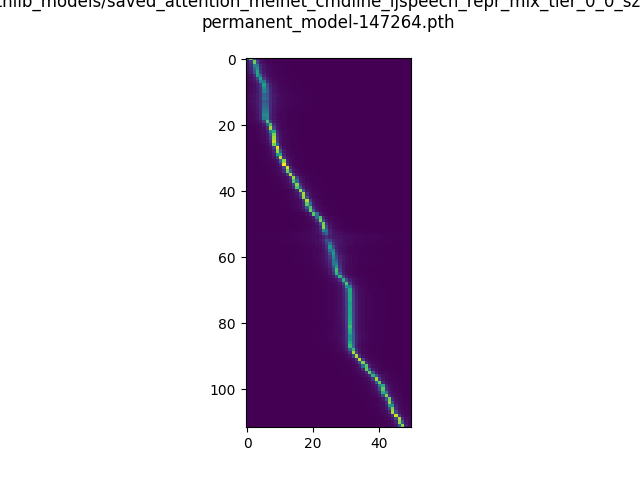

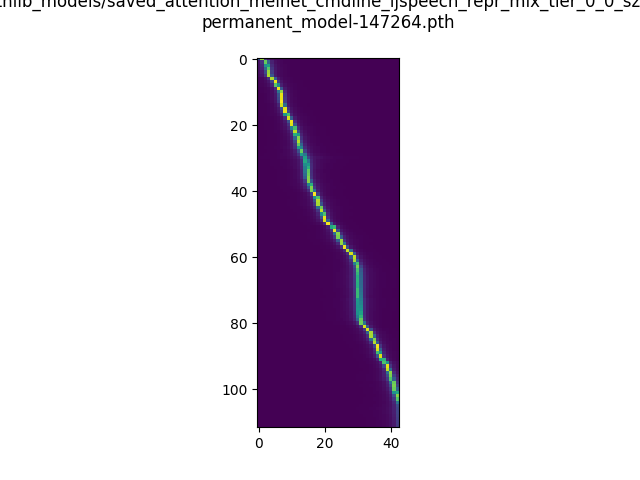

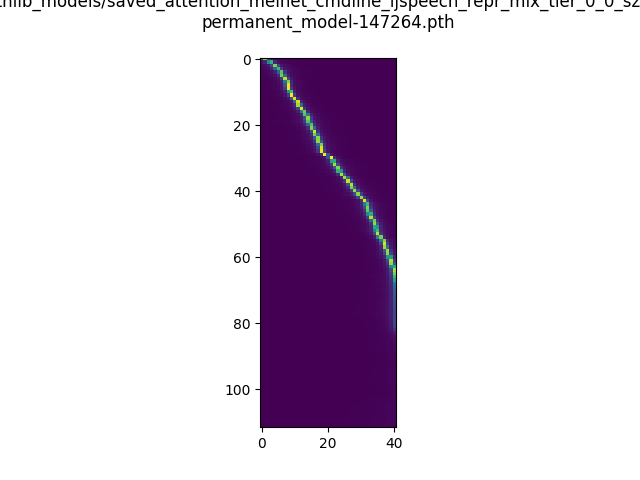

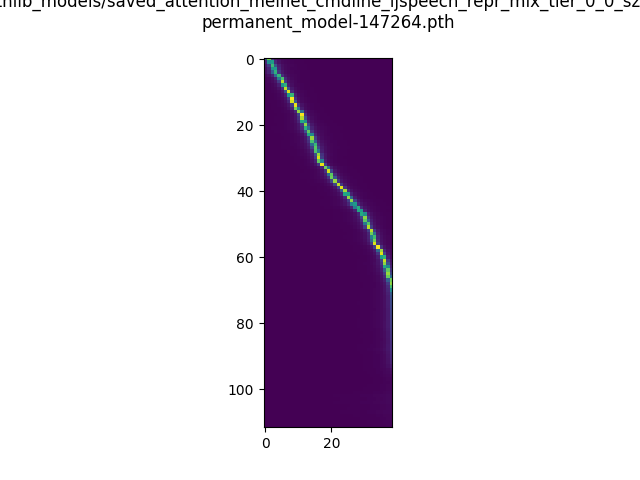

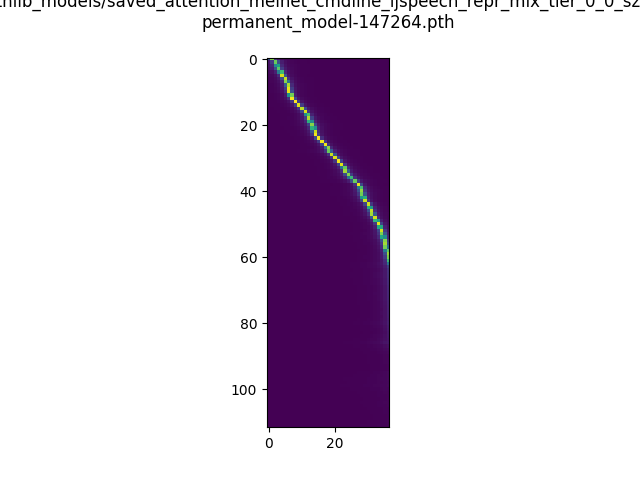

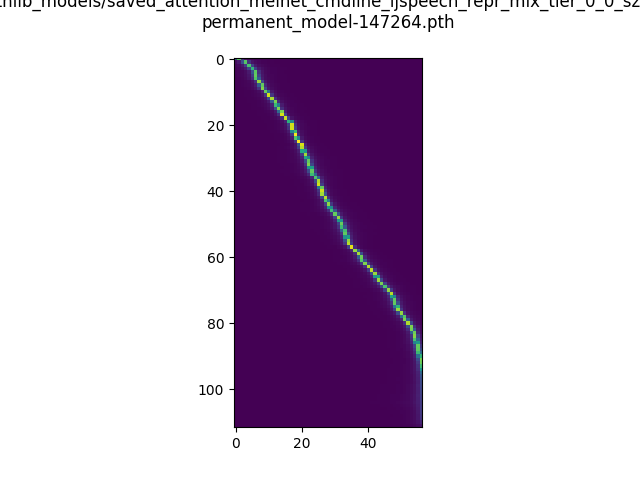

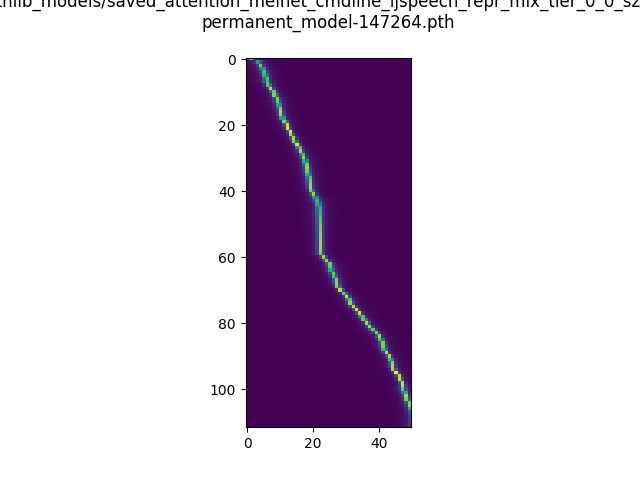

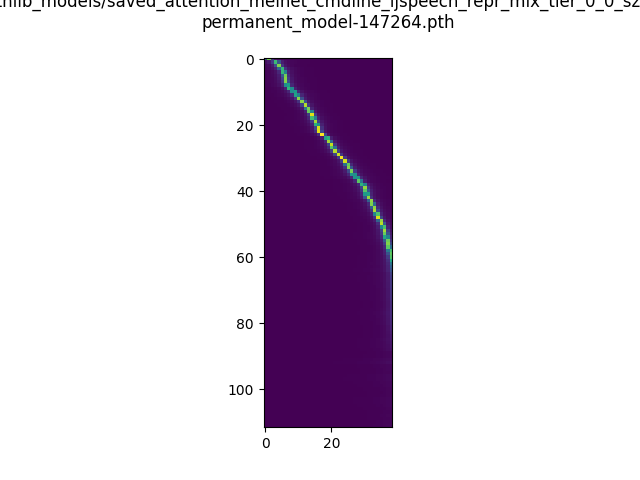

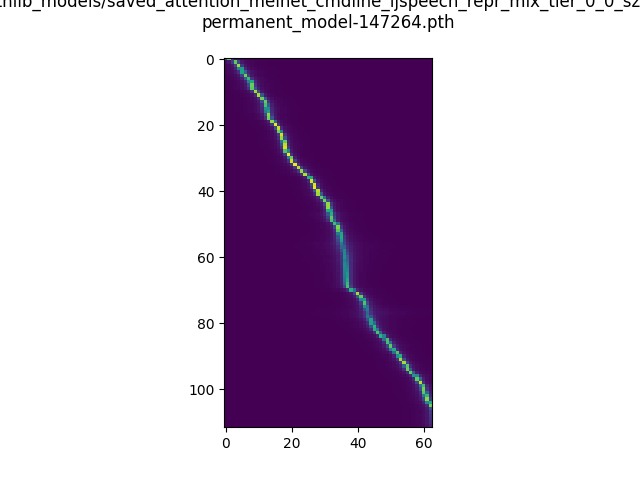

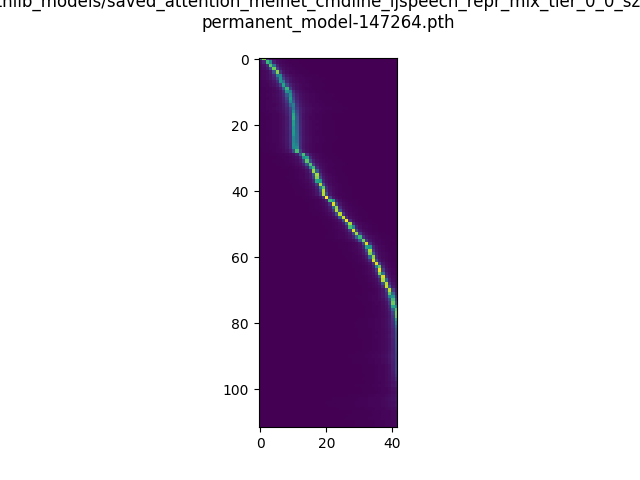

In [ ]:
from IPython.display import display, Image
used_seeds = sample_index.replace("[", "").replace("]", "").split(",")
for u in used_seeds:
    display(Image(filename='generated_samples_bias{}/sampled_forced_images/attn_0.png'.format(u)))

In [ ]:
import numpy as np
import json

# random state used for random variance on edge cases
lcl_var_random_state = np.random.RandomState(11789)
seed_speeds = []
#used_seeds = sample_index.replace("[", "").replace("]", "").split(",")
for u in used_seeds:
    bias_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/bias_information.txt".format(u)
    attention_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/attention_termination_x0.txt".format(u)
    text_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/text_info.json".format(u)
    attention_npy_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/attn_activation.npy".format(u)

    with open(bias_path, "r") as f:
        l = f.readlines()
        start_frame = int(l[1].strip().split(":")[1])
    with open(attention_path, "r") as f:
       l = f.readlines()
       end_frame = int(l[1].strip().split(":")[1])
    with open(text_path, "r") as f:
        text_json = json.load(f) 

    attn_npy_data = np.load(attention_npy_path)[:, 0, 0, :]
   
    diff = end_frame - start_frame
    # if for some reason the detected end frame is before the start, it is bad
    if diff < 0:
        diff = np.inf
    # hard coded end for now (112 is the total time len) - means the attention didn't finish
    # possibly that it finished AT the last step, still no good
    # dont trust this , use percentile instead
    #if end_frame == 111:
    #    diff = np.inf
    horiz_breaks = np.where(np.sum(attn_npy_data > np.percentile(attn_npy_data, 95), axis=0) == 0)[0]
    if len(horiz_breaks) > 0:
        diff = np.inf

    # there should be at least 1 vertical step with nothing
    vert_breaks = np.where(np.sum(attn_npy_data > np.percentile(attn_npy_data, 95), axis=1) == 0)[0]
    if len(vert_breaks) < 1:
        diff = np.inf
    
    # check the "energy" of the attention (95th+ percentile) goes through the entire sequence
    # no gaps in time (attention usually breaks apart in failure cases, gives values < 95 percentile)
    #plt.imshow(attn_npy_data > np.percentile(attn_npy_data, 95), cmap="viridis")
    breaks = np.where(np.sum(attn_npy_data > np.percentile(attn_npy_data, 90), axis=1) == 0)[0] 
    if len(breaks) > 0:
        # see if any breaks occur within our phrase
        if np.any((breaks >= start_frame) & (breaks <= end_frame)):
            diff = np.inf

    ljkey = [k for k in text_json.keys() if "LJ" in k][0]
    for w in text_json[ljkey]["full_alignment"]["words"]:
        # check that all words are within the 4 second window
        # otherwise the attention might seem to work well but cut off
        # since the conditioning was cut off
        if w["end"] >= 4:
            diff = np.inf

    if diff != np.inf:
        thresh_attn = attn_npy_data > np.percentile(attn_npy_data, 90)
        vv = np.where(thresh_attn)
        s_i = np.where(vv[0] == start_frame)[0]
        e_i = np.where(vv[0] == end_frame)[0]
        if len(s_i) < 1 or len(e_i) < 1:
            rank = np.inf
        else:
            avg_slope = (np.mean(e_i) - np.mean(s_i)) / (end_frame - start_frame)
            attn_avg = []
            for _ii in range(start_frame, end_frame):
                el_i = np.where(vv[0] == _ii)[0]
                if len(el_i) > 0:
                    lcl_mean = np.mean(vv[1][el_i])
                    attn_avg.append(lcl_mean)
                else:
                    rank = np.inf
                    break
            attn_avg = np.array(attn_avg)
            grad_avg_attn_diff = (np.abs(attn_avg[1:] - attn_avg[:-1]) - avg_slope) ** 2
            # var or lowest high-percentile value...
            rank = np.percentile(grad_avg_attn_diff, 80)
            #rank = np.max(grad_avg_attn_diff)
    else:
        rank = np.inf
 
    seed_speeds.append((u, attn_npy_data, start_frame, end_frame, rank, diff))
print("All seed info")
# sort by rank
print([(el[0], el[2], el[3], el[4], el[5]) for el in seed_speeds])

# be sure to remove filtered generations
filtered = [s for s in seed_speeds if (s[-1] < np.inf) and (s[-2] < np.inf)]
def metric_fn(x):
    # the longer the output relative to the prime, the lower the overall score
    #v1 = float(x[2]) / (np.abs(x[3] - x[2]))
    # the farther this output length is from the median over all seeds
    med_len = np.median([np.abs(t[3] - t[2]) for t in filtered])
    start_frame = x[2]
    end_frame = x[3]
    # do the rate INCLUDING the prime?
    e_i = x[1][end_frame]
    s_i = x[1][start_frame]
    avg_rate = (np.argmax(e_i) - np.argmax(s_i)) / float((end_frame - start_frame))
    # instead of avg rate compare to grad ahead and grad behind, todo
    per_step_rate_gap = [(np.argmax(x[1][_ii]) - np.argmax(x[1][_ii - 1])) - avg_rate
                         for _ii in range(start_frame, end_frame)]
    v1 = np.sum(np.abs(per_step_rate_gap))# - np.min(per_step_rate_gap))
    # nearness to the median length for all examples
    #v2 = (1. + np.abs(np.abs(x[3] - x[2]) - med_len))
    # gap between max and median, lower gap reduces overall score
    #v3 = (1. + np.max(np.max(x[1], axis=1)[x[2]:x[3]]) - np.median(np.max(x[1], axis=1)[x[2]:x[3]]))
    # gap between max and min, lower gap reduces overall score
    #v4 = (1. + np.abs(np.max(np.max(x[1], axis=1)[x[2]:x[3]]) - np.min(np.max(x[1], axis=1)[x[2]:x[3]])))
    # min floor scale, higher min will reduce overall score
    #v5 = 1. / (1 + np.min(np.max(x[1], axis=1)[x[2]:x[3]]))
    #v4 = 1. / (1 + np.min(x[1][x[2]:x[3]]))
    # final score, lower is better
    return v1 #* v5 #* v2 #* v3 * v4 * v5
  
# sort by metric function
sorted_final = sorted(filtered, key=metric_fn) 
best_seed_info = sorted_final[0]

print("Top seeds sorted by attention metric")
print([(el[0], el[2], el[3], el[4], el[5]) for el in sorted_final])

"""
rank_sorted = sorted(seed_speeds, key=lambda x: x[4])[:7]

# sort by rate to get top k (up to 4 as long as they arent invalid (np.inf in rank or diff))
topk = [r for r in rank_sorted if (r[-1] < np.inf) and (r[-2] < np.inf)]
topk_sorted = sorted(topk, key=lambda x: x[5])[:6]

# sort by attention variance
topk2 = topk_sorted
topk2_sorted = sorted(topk2, key=lambda x: np.var(np.max(x[1], axis=1)[x[2]:x[3]]))
topk2_sorted = topk2_sorted[:5]

# then final sort by attention "concentration"
# lower values will be more concentrated
topk3_sorted = sorted(topk2_sorted, key=lambda x: (x[1] > np.percentile(x[1], 90))[x[2]:x[3]].sum())
topk3_sorted = topk3_sorted[:3]

# sort by average max value of attention
sorted_final = sorted(topk3_sorted, key=lambda x: np.abs(np.max(np.max(x[1], axis=1)[x[2]:x[3]]) - np.min(np.max(x[1], axis=1)[x[2]:x[3]])))
best_seed_info = sorted_final[0]

print("Top seeds sorted by attention mean")
print([(el[0], el[2], el[3], el[4], el[5]) for el in sorted_final])
"""

"""
# finally, sort again to get final result
topk_sorted_by_rank = sorted(topk3_sorted, key=lambda x: x[4])
topk_sorted_by_rate = sorted(topk3_sorted, key=lambda x: x[5])
topk_sorted_by_prime = sorted(topk3_sorted, key=lambda x: x[2])[::-1]
# prefer primes close to avg...
#if len(topk_sorted_by_prime) > 2:
#    topk_sorted_by_prime = [topk_sorted_by_prime[1], topk_sorted_by_prime[0], topk_sorted_by_prime[2]]

print("Top seeds sorted by rank")
print([(el[0], el[2], el[3], el[4], el[5]) for el in topk_sorted_by_rank])
print("Top seeds sorted by rate")
print([(el[0], el[2], el[3], el[4], el[5]) for el in topk_sorted_by_rate])
print("Top seeds sorted by closeness to avg prime")
print([(el[0], el[2], el[3], el[4], el[5]) for el in topk_sorted_by_prime])

if len(topk_sorted_by_rank) > 1:
    # we want the method that does the best on all metrics...
    # tie break on rank
    combined_scores = []
    for n1, k1 in enumerate(topk_sorted_by_rank):
        for n2, k2 in enumerate(topk_sorted_by_rate):
            for n3, k3 in enumerate(topk_sorted_by_prime):
                if k1 == k2 and k1 == k3:
                    combined_scores.append((n1 + 1) ** 2 + (n2 + 1) ** 2 + (n3 + 1) ** 2 + .001 * k1[5])
                    break
    print("Final scores")
    print([(tup[0], [e for _nn, e in enumerate(tup[1]) if _nn != 1]) for tup in zip(combined_scores, topk_sorted_by_rank)])
    final = [(_n, tup[0], tup[1]) for _n, tup in enumerate(zip(combined_scores, topk_sorted_by_rank))]
    sorted_final = sorted(final, key=lambda x: x[1])
    best_seed_info = sorted_final[0][2]
else:
    best_seed_info = topk_sorted_by_rank[0]
""";

All seed info
[('0', 54, 111, inf, inf), ('1', 39, 107, inf, inf), ('2', 19, 79, 29.7025, 60), ('3', 21, 74, 25.856265574937698, 53), ('4', 14, 63, 28.150000000000006, 49), ('5', 46, 106, 31.82840277777778, 60), ('6', 42, 108, inf, inf), ('7', 12, 65, 30.45790316838733, 53), ('8', 76, 106, inf, inf), ('9', 31, 93, 17.653550988553587, 62)]
Top seeds sorted by attention metric
[('4', 14, 63, 28.150000000000006, 49), ('3', 21, 74, 25.856265574937698, 53), ('7', 12, 65, 30.45790316838733, 53), ('5', 46, 106, 31.82840277777778, 60), ('2', 19, 79, 29.7025, 60), ('9', 31, 93, 17.653550988553587, 62)]


In [ ]:
print("Autoselected best seed {}, start frame {}, end frame {}".format(best_seed_info[0], best_seed_info[2], best_seed_info[3]))
best_seed = int(best_seed_info[0])

# can override best seed autoselected for manual listening
#best_seed = 2

Autoselected best seed 4, start frame 14, end frame 63


# Post-Net


In [ ]:
# example plots
'''
thresh_attn = attn_npy_data > np.percentile(attn_npy_data, 95)
vv = np.where(thresh_attn)
attn_avg = []
for _ii in range(thresh_attn.shape[0]):
    el_i = np.where(vv[0] == _ii)[0]
    if len(el_i) > 0:
        lcl_mean = np.mean(vv[1][el_i])
    else:
        lcl_mean = 0
    attn_avg.append(lcl_mean)
attn_avg = np.array(attn_avg)
grad_avg_attn = (attn_avg[1:] - attn_avg[:-1]) ** 2
rank = np.var(grad_avg_attn)
plt.imshow(thresh_attn, cmap="viridis")
plt.figure()
plt.plot(attn_avg)
plt.figure()
plt.plot(grad_avg_attn)
print(rank)
''';

In [ ]:
cd ~/stexp/wavernn_ljspeech_downsample_4_0_0_alt/

/root/stexp/wavernn_ljspeech_downsample_4_0_0_alt


In [ ]:
#! git pull

In [ ]:
ls

audio.py                      hparams.py            preprocess.py
checkpoint_step000450000.pth  INFO                  __pycache__/
cleaned_data.wav              LICENSE               recent_sample_cmd.sh
dataset.py                    loss_function.py      reconstruct_cmd.sh
deconstruct_wav.py            lrschedule.py         reconstruct_npy.py
distributions.py              make_combined_dir.sh  requirements.txt
eval/                         model.py              train.py
eval.py                       noisy_example.wav     utils.py
hparams_old.py                preprocess_old.py


In [ ]:
if not os.path.exists("eval"):
    os.mkdir("eval")

In [ ]:
full_wavernn_sample_cmd = "CUDA_VISIBLE_DEVICES='' python reconstruct_npy.py"
full_wavernn_sample_cmd += " /root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/unnormalized_samples.npy".format(best_seed)
full_wavernn_sample_cmd += " --checkpoint=/root/stexp/wavernn_ljspeech_downsample_4_0_0_alt/checkpoint_step000450000.pth"
full_wavernn_sample_cmd += " --bias_information=/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/bias_information.txt".format(best_seed)
full_wavernn_sample_cmd += " --bias_data_frame_offset=0"
full_wavernn_sample_cmd += " --bias_data_frame_offset_right=0"
full_wavernn_sample_cmd += " --fixed_pad_left=0"
full_wavernn_sample_cmd += " --fixed_pad_right=0"
full_wavernn_sample_cmd += " --attention_information=/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/attention_termination_x0.txt".format(best_seed)

In [ ]:
! $full_wavernn_sample_cmd

Setting all possible default seeds based on 40000
using device:cpu
building model with quantized bit audio
Trainable Parameters: 9.420 million
using fixed learning rate of :5e-06
Load checkpoint from: /root/stexp/wavernn_ljspeech_downsample_4_0_0_alt/checkpoint_step000450000.pth
Load optimizer state from /root/stexp/wavernn_ljspeech_downsample_4_0_0_alt/checkpoint_step000450000.pth
100% 88800/88800 [04:16<00:00, 346.79it/s]


# Raw, Full & Cleaned

In [ ]:
fs, d = wavfile.read("eval/eval_checkpoint_step000450000_wav_0.wav")
synth_ts = d.astype('float32') / (2 ** 15)
synth_ts -= synth_ts.mean()
Audio(data=soundsc(synth_ts), rate=22050)

In [ ]:
fs, d = wavfile.read("eval/eval_checkpoint_step000450000_wav_0_full.wav")
synth_ts = d.astype('float32') / (2 ** 15)
synth_ts -= synth_ts.mean()
Audio(data=soundsc(synth_ts), rate=22050)

In [ ]:
import noisereduce as nr 
import shutil
#load data 
if not os.path.exists("noisy_example.wav"):
    shutil.copy2("/content/drive/MyDrive/melnet_sampling_resources/noisy_example.wav", "noisy_example.wav")
noise_rate, noise_data = wavfile.read("noisy_example.wav") 
# select section of data that is noise 
noise_part = noise_data[-18000:-5000] 

rate, data = wavfile.read("eval/eval_checkpoint_step000450000_wav_0.wav") 
# perform noise reduction 
cleaned_data = nr.reduce_noise(y=data, y_noise=noise_part, sr=rate) 
wavfile.write("cleaned_data.wav", rate, cleaned_data)
fs, d = wavfile.read("cleaned_data.wav")
Audio(data=d, rate=22050)

In [ ]:
ls

audio.py                      hparams.py            preprocess.py
checkpoint_step000450000.pth  INFO                  __pycache__/
cleaned_data.wav              LICENSE               recent_sample_cmd.sh
dataset.py                    loss_function.py      reconstruct_cmd.sh
deconstruct_wav.py            lrschedule.py         reconstruct_npy.py
distributions.py              make_combined_dir.sh  requirements.txt
eval/                         model.py              train.py
eval.py                       noisy_example.wav     utils.py
hparams_old.py                preprocess_old.py


In [ ]:
# take top 3 audio files, run through recognizer and selected best?

In [ ]:
# plug in "quality improvement" wavernn

In [ ]:
cd ~/stexp/wavernn_ljspeech_fullres_cleanup

/root/stexp/wavernn_ljspeech_fullres_cleanup


In [ ]:
upres_wavernn_sample_cmd = "CUDA_VISIBLE_DEVICES='' python reconstruct_wav.py"
upres_wavernn_sample_cmd += " /root/stexp/wavernn_ljspeech_downsample_4_0_0_alt/cleaned_data.wav"
upres_wavernn_sample_cmd += " --checkpoint=/root/stexp/wavernn_ljspeech_fullres_cleanup/checkpoint_step000520000.pth"

In [ ]:
#upres_wavernn_sample_cmd = "CUDA_VISIBLE_DEVICES='' python reconstruct_wav.py"
#upres_wavernn_sample_cmd += " /root/stexp/wavernn_ljspeech_downsample_4_0_0_alt/eval/eval_checkpoint_step000450000_wav_0.wav"
#upres_wavernn_sample_cmd += " --checkpoint=/root/stexp/wavernn_ljspeech_fullres_cleanup/checkpoint_step000520000.pth"

In [ ]:
! $upres_wavernn_sample_cmd

Setting all possible default seeds based on 2899
Setting all possible default seeds based on 40000
using device:cpu
building model with quantized bit audio
Trainable Parameters: 9.743 million
using fixed learning rate of :5e-06
Load checkpoint from: /root/stexp/wavernn_ljspeech_fullres_cleanup/checkpoint_step000520000.pth
Load optimizer state from /root/stexp/wavernn_ljspeech_fullres_cleanup/checkpoint_step000520000.pth
100% 37800/37800 [01:51<00:00, 339.34it/s]


# Upres

In [ ]:
fs, d = wavfile.read("eval/eval_checkpoint_step000520000_wav_0_full.wav")
Audio(data=d, rate=22050)

In [ ]:
#cd /home/kkastner/_kkpthlib_models/saved_attention_melnet_cmdline_ljspeech_repr_mix_tier_0_0_sz_112_32/saved_models/

In [ ]:
#! git pull

In [ ]:
import time
while True:
    time.sleep(2)

In [ ]:
# plot the groundtruth
text_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias4/teacher_forced_images/text_info.json"
small_npy_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias4/teacher_forced_images/small_x0.npy"
data_npy_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias4/teacher_forced_images/data_x0.npy"

small_data = np.load(small_npy_path)
full_data = np.load(data_npy_path)
with open(text_path, "r") as f:
    text_json = json.load(f) 

In [ ]:
import pprint
pprint.pprint(text_json)

In [ ]:
plt.imshow(full_data.T, interpolation="nearest", cmap="viridis", origin="lower")
plt.axis("off");
plt.savefig("/root/full_mel.png", transparent=True, bbpx_inches="tight", pad_inches=0)

In [ ]:
plt.imshow(small_data.T, interpolation="nearest", cmap="viridis", origin="lower")
plt.axis("off");
plt.savefig("/root/small_mel.png", transparent=True, bbox_inches="tight", pad_inches=0)

In [ ]:
# plot the sample and attention
plot_sample = 9
sample_text_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/text_info.json".format(plot_sample)
bias_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/bias_information.txt".format(plot_sample)
termination_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/attention_termination_x0.txt".format(plot_sample)
attn_npy_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/attn_activation.npy".format(plot_sample)
sample_npy_data_path = "/root/kkpthlib/examples/attention_melnet_cmdline_ljspeech_repr_mix/generated_samples_bias{}/sampled_forced_images/unnormalized_samples.npy".format(plot_sample)

attn_npy_data = np.load(attn_npy_path)
sample_npy_data = np.load(sample_npy_data_path)
with open(sample_text_path, "r") as f:
    sample_text_json = json.load(f) 

with open(bias_path, "r") as f:
    l = f.readlines()
    start_frame = int(l[1].strip().split(":")[1])

with open(termination_path, "r") as f:
    l = f.readlines()
    end_frame = int(l[1].strip().split(":")[1])

In [ ]:
text_tup = [('$', 0.0), ('ih', 1.0), ('n', 1.0), (' ', 0.0), ('ah', 1.0), ('d', 1.0), ('ih', 1.0), ('sh', 1.0), ('ah', 1.0), ('n', 1.0), (' ', 0.0), ('dh', 1.0), ('ah', 1.0), (' ', 0.0), ('dh', 1.0), ('eh', 1.0), ('r', 1.0), (' ', 0.0), ('b', 1.0), ('ow', 1.0), ('t', 1.0), (' ', 0.0), ('s', 1.0), ('ae', 1.0), ('ng', 1.0), ('k', 1.0), (' ', 0.0), ('ih', 1.0), ('n', 1.0), ('t', 1.0), ('uw', 1.0), (' ', 0.0), ('dh', 1.0), ('iy', 1.0), (' ', 0.0), ('ay', 1.0), ('s', 1.0), ('iy', 1.0), (' ', 0.0), ('r', 1.0), ('ih', 1.0), ('v', 1.0), ('er', 1.0), ('~', 0.0)]
#text_tup = [('$', 0.0), ('hh', 1.0), ('uw', 1.0), ('z', 1.0), (' ', 0.0), ('l', 1.0), ('ay', 1.0), ('f', 1.0), (' ', 0.0), ('dh', 1.0), ('eh', 1.0), ('r', 1.0), (' ', 0.0), ('b', 1.0), ('ow', 1.0), ('t', 1.0), (' ', 0.0), ('s', 1.0), ('ae', 1.0), ('ng', 1.0), ('k', 1.0), (' ', 0.0), ('ih', 1.0), ('n', 1.0), ('t', 1.0), ('uw', 1.0), (' ', 0.0), ('dh', 1.0), ('iy', 1.0), (' ', 0.0), ('ay', 1.0), ('s', 1.0), ('iy', 1.0), (' ', 0.0), ('r', 1.0), ('ih', 1.0), ('v', 1.0), ('er', 1.0), ('~', 0.0)]
#text_tup = [('$', 0.0), ('ae', 1.0), ('n', 1.0), ('d', 1.0), (' ', 0.0), ('dh', 1.0), ('iy', 1.0), (' ', 0.0), ('ae', 1.0), ('g', 1.0), ('r', 1.0), ('ah', 1.0), ('g', 1.0), ('ih', 1.0), ('t', 1.0), (' ', 0.0), ('ah', 1.0), ('m', 1.0), ('aw', 1.0), ('n', 1.0), ('t', 1.0), (' ', 0.0), ('dh', 1.0), ('eh', 1.0), ('r', 1.0), (' ', 0.0), ('b', 1.0), ('ow', 1.0), ('t', 1.0), (' ', 0.0), ('s', 1.0), ('ae', 1.0), ('ng', 1.0), ('k', 1.0), (' ', 0.0), ('ih', 1.0), ('n', 1.0), ('t', 1.0), ('uw', 1.0), (' ', 0.0), ('dh', 1.0), ('iy', 1.0), (' ', 0.0), ('ay', 1.0), ('s', 1.0), ('iy', 1.0), (' ', 0.0), ('r', 1.0), ('ih', 1.0), ('v', 1.0), ('er', 1.0), ('~', 0.0)]
#text_tup = [('$', 0.0), ('w', 1.0), ('ay', 1.0), ('l', 1.0), ('s', 1.0), ('t', 1.0), (' ', 0.0), ('l', 1.0), ('ah', 1.0), ('d', 1.0), ('g', 1.0), ('ey', 1.0), ('t', 1.0), ('eh', 1.0), (' ', 0.0), ('dh', 1.0), ('eh', 1.0), ('r', 1.0), (' ', 0.0), ('b', 1.0), ('ow', 1.0), ('t', 1.0), (' ', 0.0), ('s', 1.0), ('ae', 1.0), ('ng', 1.0), ('k', 1.0), (' ', 0.0), ('ih', 1.0), ('n', 1.0), ('t', 1.0), ('uw', 1.0), (' ', 0.0), ('dh', 1.0), ('iy', 1.0), (' ', 0.0), ('ay', 1.0), ('s', 1.0), ('iy', 1.0), (' ', 0.0), ('r', 1.0), ('ih', 1.0), ('v', 1.0), ('er', 1.0), ('~', 0.0)]

print(len(text_tup))
print(attn_npy_data[:, 0, 0, :].shape)
print(text_tup)
print(text_tup[15:])

In [ ]:
print(start_frame)
print(end_frame)

start_text_frame = 15
attn_crop = attn_npy_data[start_frame:end_frame, 0, 0, start_text_frame:].astype("float32")

In [ ]:
plt.imshow(attn_crop.T, interpolation="nearest", cmap="viridis", origin="upper")
tok = [t[0] for t in text_tup][start_text_frame:]
print(tok)
ax = plt.gca()
plt.yticks(np.arange(len(tok)))
ax.set_yticklabels(tok)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks([])
plt.savefig("/root/attn_{}.png".format(plot_sample), transparent=True, bbox_inches="tight", pad_inches=0) 
#plt.axis("off");

In [ ]:
plt.imshow(sample_npy_data[0, start_frame:end_frame, :, 0].T,
           origin="lower", cmap="viridis", interpolation="nearest")
ax = plt.gca()
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.savefig("/root/sample_{}.png".format(plot_sample), transparent=True, bbox_inches="tight", pad_inches=0) 

In [ ]:
sampled_full_mel_path = "/root/stexp/wavernn_ljspeech_fullres_cleanup/eval/mel.npy"
sampled_full_mel_data = np.load(sampled_full_mel_path)

In [ ]:
sampled_full_mel_data.shape

In [ ]:
plt.imshow(sampled_full_mel_data,
           origin="lower", cmap="viridis", interpolation="nearest")
ax = plt.gca()
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.savefig("/root/sample_full_{}.png".format(plot_sample), transparent=True, bbox_inches="tight", pad_inches=0)

In [ ]:
#! cp -pr ~/kkpthlib/examples/attention_melnet_cmdline/log.log /content/drive/MyDrive/melnet_sampling_outputs/
#! cp -pr ~/kkpthlib/examples/attention_melnet_cmdline/tier* /content/drive/MyDrive/melnet_sampling_outputs/
#! cp -pr ~/kkpthlib/examples/attention_melnet_cmdline/combined_unnormalized_samples.npy /content/drive/MyDrive/melnet_sampling_outputs/
#! cp -pr eval/ /content/drive/MyDrive/melnet_sampling_outputs/